In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-06-21 09:49:27.340612: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

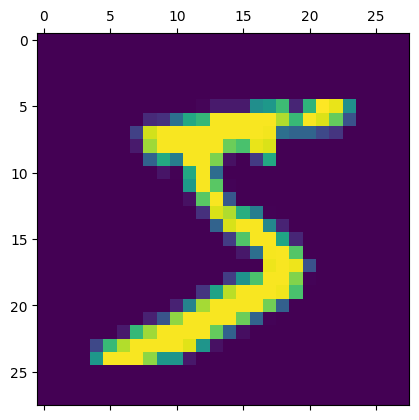

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train_flattened = X_train.reshape(-1, 28 * 28) / 255.0
X_test_flattened = X_test.reshape(-1, 28 * 28) / 255.0
X_train_flattened.shape

(60000, 784)

In [8]:
from sklearn.preprocessing import OneHotEncoder

X_train_flattened = X_train_flattened.astype('float32')
X_test_flattened = X_test_flattened.astype('float32')

# One-hot encode the labels
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test = one_hot_encoder.transform(y_test.reshape(-1, 1))

In [9]:
print(X_train_flattened.dtype, y_train.dtype)

float32 float64


In [10]:
len(y_train)

60000

In [11]:

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.layers import TextVectorization, Embedding, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

# Define the neural network structure
input_size = 28 * 28
hidden_layers = (128, 64)
output_size = 10

def create_model(weights=None):
    model = Sequential([
        Dense(hidden_layers[0], activation='relu', input_shape=(input_size,)),
        Dense(hidden_layers[1], activation='relu'),
        Dense(output_size, activation='softmax')
    ])
    if weights is not None:
        model.set_weights(weights)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
import mlrose_hiive
from sklearn.metrics import accuracy_score

# Define a fitness function to optimize the neural network weights
def fitness_function(weights):
    model = create_model()
    initial_weights = model.get_weights()
    
    weights = []
    start = 0
    for w in initial_weights:
        size = np.prod(w.shape)
        weights.append(flat_weights[start:start + size].reshape(w.shape))
        start += size
    
    # Create and compile the model with the reshaped weights
    model.set_weights(weights)
    model.fit(X_train_flattened, y_train, epochs=1, batch_size=128, verbose=0)
    y_pred = model.predict(X_train_flattened)
    accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(y_pred, axis=1))
    return -accuracy

In [13]:
# Initialize the weights with a random guess
model = create_model()
initial_weights = model.get_weights()
initial_weights

[array([[ 0.04933555, -0.05175035,  0.00897311, ..., -0.0485284 ,
          0.00864103, -0.07225052],
        [-0.00425825, -0.03130114, -0.05208448, ...,  0.01712126,
          0.04989598, -0.0731928 ],
        [ 0.07226679,  0.00074886, -0.07983489, ..., -0.02963368,
         -0.07261953, -0.01261418],
        ...,
        [-0.02533507,  0.01475886, -0.07790871, ..., -0.03423038,
         -0.05133354, -0.02847402],
        [ 0.0711079 , -0.04805684,  0.00905131, ..., -0.06918758,
          0.00613424, -0.0437852 ],
        [ 0.07238918,  0.03010298, -0.03462826, ..., -0.03147376,
          0.04372422, -0.02832864]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [14]:
# Flatten the weights for the optimization algorithm
flat_weights = np.concatenate([w.flatten() for w in initial_weights])
discrete_initial_weights = ((flat_weights + 1) * 10).astype(int)
flat_weights

array([ 0.04933555, -0.05175035,  0.00897311, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [15]:
# Define the optimization problem
problem = mlrose_hiive.DiscreteOpt(length=flat_weights.size, fitness_fn=mlrose_hiive.CustomFitness(fitness_function), maximize=False, max_val=21)

In [16]:
# Perform genetic algorithm optimization
schedule = mlrose_hiive.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule=schedule, max_attempts=10, max_iters=30, random_state=42)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step
1875/1875 

In [17]:
# Map the best state back to continuous weights
best_continuous_weights = best_state / 10 - 1

In [18]:
# Reshape the optimized weights
start = 0
optimized_weights = []
for w in initial_weights:
    size = np.prod(w.shape)
    optimized_weights.append(best_continuous_weights[start:start + size].reshape(w.shape))
    start += size

In [19]:
# Create and compile the model with the optimized weights
model_optimized = create_model(optimized_weights)
model_optimized.fit(X_train_flattened, y_train, epochs=46, batch_size=128, verbose=1)

# Evaluate the optimized model
train_loss, train_accuracy = model_optimized.evaluate(X_train_flattened, y_train, verbose=0)
test_loss, test_accuracy = model_optimized.evaluate(X_test_flattened, y_test, verbose=0)

print(f'Optimized Training Accuracy: {train_accuracy:.4f}')
print(f'Optimized Testing Accuracy: {test_accuracy:.4f}')

Epoch 1/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4876 - loss: 24.4230
Epoch 2/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8316 - loss: 3.0538
Epoch 3/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8744 - loss: 1.7591
Epoch 4/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8997 - loss: 1.1651
Epoch 5/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9138 - loss: 0.8621
Epoch 6/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9255 - loss: 0.6443
Epoch 7/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9365 - loss: 0.4984
Epoch 8/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9427 - loss: 0.4039
Epoch 9/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.3281
Epoch 10/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.2605
Epoch 11/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9618 - loss: 0.2053
Epoch 12/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [20]:
# Generate predictions for the test set
y_pred_test_optimized = model_optimized.predict(X_test_flattened)
y_pred_test_optimized_labels = np.argmax(y_pred_test_optimized, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.94      0.94      0.94       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.94      0.93      0.93       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



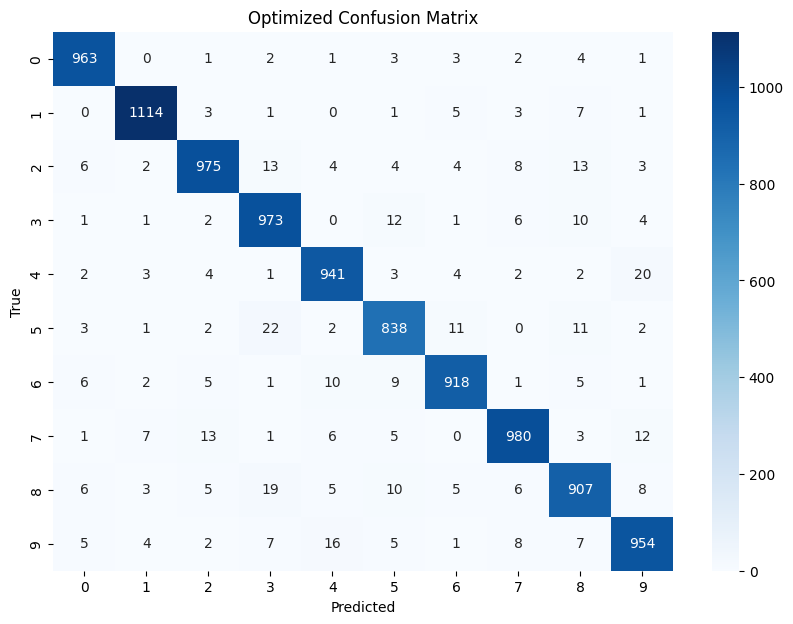

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_test_optimized_labels))

# Generate confusion matrix
conf_matrix_optimized = confusion_matrix(y_test_labels, y_pred_test_optimized_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Optimized Confusion Matrix')
plt.show()